In [1]:
#%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1)

'1.13.1'

# Imporing relevant Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from tensorflow.keras import optimizers



# Importing Data

In [5]:
import h5py
import numpy as np


h5f = h5py.File('F:\PGP AIML\Project 7\data\SVHN_single_grey1.h5','r')

# Data Split in to Train, Validation and Test

In [6]:
X_train1 = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]

h5f.close()


In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = 0.2, random_state = 7)

In [98]:
training_set_shape = X_train.shape
print(training_set_shape)

(33600, 32, 32)


In [99]:
validation_set_shape = X_val.shape
print(validation_set_shape)

(8400, 32, 32)


In [100]:
test_set_shape = X_test.shape
print(test_set_shape)

(18000, 32, 32)


# Visualizing a few samples from data

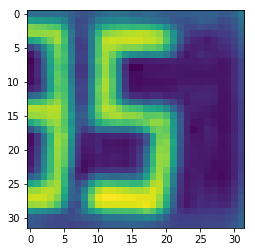

Label:  5


In [63]:
plt.imshow(X_train[100])    # show first number in the dataset
plt.show()
print('Label: ', y_train[100])


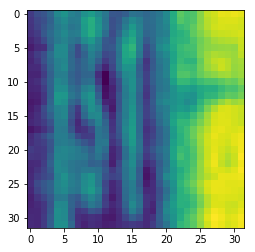

Label:  1


In [64]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test1[0])


# Prepossesing the data

In [8]:
# reshaping X data: (n, 32, 32) => (n, 1024)
X_train = X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [9]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test1 = to_categorical(y_test1)

# Creating Model:
   # Initializing the loop with possible best Hyper parameters

In [41]:
def train_and_test_loop1(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model1 = Sequential()
    
    model1.add(Dense(100, input_shape = (1024, ), kernel_initializer='he_normal'))
    model1.add(BatchNormalization())
    model1.add(Activation('relu'))
    model1.add(Dropout(0.2))
    model1.add(Dense(100, kernel_initializer='he_normal'))
    model1.add(BatchNormalization())
    model1.add(Activation('relu'))    
    model1.add(Dropout(0.2))
    model1.add(Dense(100, kernel_initializer='he_normal'))
    model1.add(BatchNormalization())
    model1.add(Activation('relu'))
    model1.add(Dropout(0.2))
    model1.add(Dense(70, kernel_initializer='he_normal'))
    model1.add(BatchNormalization())
    model1.add(Activation('relu'))
    model1.add(Dropout(0.2))
    model1.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    

    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model1.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)
    score = model1.evaluate(X_train, y_train, verbose=0)
    
    return score

# Accuracy at lr = 0.00001 and Lambda = 0

In [116]:
lr = 0.00001
Lambda = 0
train_and_test_loop1(1, lr, Lambda)

33600/33600 [==============================] - 7s 211us/sample - loss: 2.7338 - acc: 0.0998


[3.641143658501761, 0.10017857]

# Hyper Parameter Optimization

In [117]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/100
33600/33600 [==============================] - 8s 233us/sample - loss: 2.6887 - acc: 0.1047s - loss: 
Epoch 2/100
33600/33600 [==============================] - 3s 93us/sample - loss: 2.6944 - acc: 0.1003
Epoch 3/100
33600/33600 [==============================] - 3s 91us/sample - loss: 2.6842 - acc: 0.1062
Epoch 4/100
33600/33600 [==============================] - 3s 92us/sample - loss: 2.6897 - acc: 0.10392s - loss: 2.7073  - ETA: 1s - loss: 2.684
Epoch 5/100
33600/33600 [==============================] - 3s 90us/sample - loss: 2.6874 - acc: 0.1031
Epoch 6/100
33600/33600 [==============================] - 3s 90us/sample - loss: 2.6916 - acc: 0.10490s - loss: 2.6969 - acc: 0.
Epoch 7/100
33600/33600 [==============================] - 3s 93us/sample - loss: 2.6884 - acc: 0.1051
Epoch 8/100
33600/33600 [==============================] - 3s 93us/sample - loss: 2.6833 - acc: 0.10342s - loss:
Epoch 9/100
33600/33600 [==============================] - 3s 88us/sample - loss: 2.69

# We found that in cycle 2 there were best results with: Try 2/100: Best_val_acc: [0.6108700076100372, 0.8087798], lr: 0.02098856385734849, Lambda: 0.0003801922142446604


# Fine Tuning model with the optimised hyper parameter values

In [33]:
lr = 0.021
Lambda = 0.000380
train_and_test_loop1(100, lr, Lambda)

Epoch 1/100
33600/33600 [==============================] - 3s 101us/sample - loss: 2.5123 - acc: 0.1119
Epoch 2/100
33600/33600 [==============================] - 2s 49us/sample - loss: 2.2764 - acc: 0.1667
Epoch 3/100
33600/33600 [==============================] - 2s 45us/sample - loss: 2.0652 - acc: 0.2510
Epoch 4/100
33600/33600 [==============================] - 2s 47us/sample - loss: 1.8530 - acc: 0.34071s - loss: 
Epoch 5/100
33600/33600 [==============================] - 1s 44us/sample - loss: 1.6823 - acc: 0.4125
Epoch 6/100
33600/33600 [==============================] - 1s 45us/sample - loss: 1.5444 - acc: 0.4685
Epoch 7/100
33600/33600 [==============================] - 1s 44us/sample - loss: 1.4505 - acc: 0.5038
Epoch 8/100
33600/33600 [==============================] - 2s 46us/sample - loss: 1.3683 - acc: 0.5389
Epoch 9/100
33600/33600 [==============================] - 1s 45us/sample - loss: 1.3212 - acc: 0.5585
Epoch 10/100
33600/33600 [==============================] - 2

[0.6922922841991697, 0.77758926]

# Designing our model with identified Parameters and Hyper Parameter as above

In [45]:
## hyperparameters
iterations = 100
learning_rate = 0.021
Lambda = 0.000380
hidden_nodes = 256
output_nodes = 10

model1 = Sequential()
    
model1.add(Dense(100, input_shape = (1024, ), kernel_initializer='he_normal'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.2))
model1.add(Dense(100, kernel_initializer='he_normal'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))    
model1.add(Dropout(0.2))
model1.add(Dense(100, kernel_initializer='he_normal'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.2))
model1.add(Dense(70, kernel_initializer='he_normal'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.2))
model1.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    

sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
model1.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)

Epoch 1/100
33600/33600 [==============================] - 4s 120us/sample - loss: 2.5148 - acc: 0.1146
Epoch 2/100
33600/33600 [==============================] - 1s 42us/sample - loss: 2.2626 - acc: 0.1730
Epoch 3/100
33600/33600 [==============================] - 1s 40us/sample - loss: 2.0738 - acc: 0.2480
Epoch 4/100
33600/33600 [==============================] - 1s 40us/sample - loss: 1.8939 - acc: 0.3188
Epoch 5/100
33600/33600 [==============================] - 1s 40us/sample - loss: 1.7325 - acc: 0.3885
Epoch 6/100
33600/33600 [==============================] - 1s 40us/sample - loss: 1.6208 - acc: 0.4396
Epoch 7/100
33600/33600 [==============================] - 1s 41us/sample - loss: 1.5050 - acc: 0.4862
Epoch 8/100
33600/33600 [==============================] - 1s 40us/sample - loss: 1.4216 - acc: 0.5222
Epoch 9/100
33600/33600 [==============================] - 2s 58us/sample - loss: 1.3640 - acc: 0.5429
Epoch 10/100
33600/33600 [==============================] - 2s 62us/samp

In [46]:
results = model1.evaluate(X_test, y_test1)

18000/18000 [==============================] - 3s 145us/sample - loss: 0.7828 - acc: 0.7559


In [47]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7558889


In [48]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               102500    
_________________________________________________________________
batch_normalization_v1_12 (B (None, 100)               400       
_________________________________________________________________
activation_12 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_v1_13 (B (None, 100)               400       
_________________________________________________________________
activation_13 (Activation)   (None, 100)               0         
__________